## Task-3 Exploratory Data Analysis Retail
## Author : Aditya Mishra
## Performing EDA over dataset ' Sample SuperStore'

## Sample SuperStore

## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

## Importing the dataset

In [3]:
raw_data = pd.read_csv(r'C:\Users\r\Downloads\SampleSuperstore.csv')
raw_data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
## Description of data include is used to display all of it or only numerical data desc. is done as default
raw_data.describe(include = 'all')

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
count,9994,9994,9994,9994,9994,9994.000000,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,4,3,1,531,49,NaN,4,3,17,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,United States,New York City,California,NaN,West,Office Supplies,Binders,NaN,NaN,NaN,NaN
freq,5968,5191,9994,915,2001,NaN,3203,6026,1523,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,55190.379428,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,NaN,NaN,NaN,NaN,NaN,32063.693350,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,NaN,NaN,NaN,NaN,NaN,56430.500000,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


## Checking the number of null values

In [5]:
raw_data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

## Visualization
## The plot is done using the histplot function in seaborn

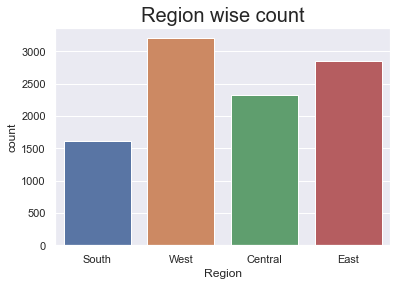

In [6]:
plt.title('Region wise count', fontsize = 20)
sns.countplot(raw_data['Region'])
plt.show()

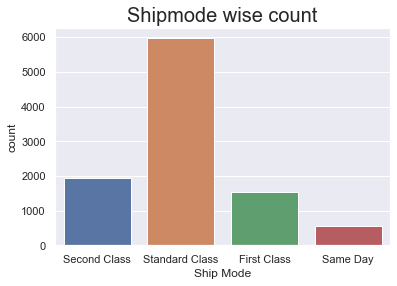

In [7]:
plt.title('Shipmode wise count', fontsize = 20)
sns.countplot(raw_data['Ship Mode'])
plt.show()

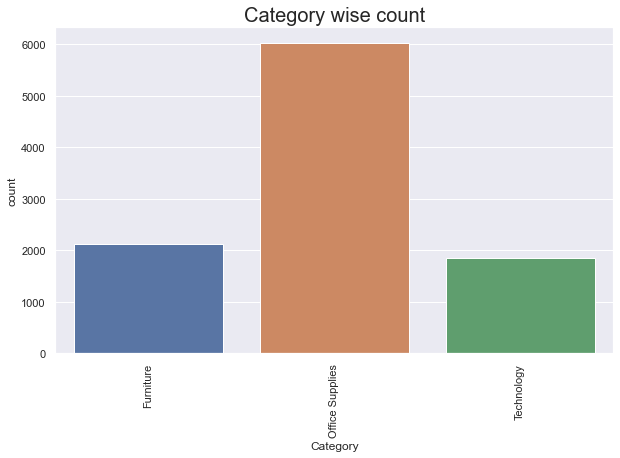

In [8]:

plt.figure(figsize = (10,6))
plt.title('Category wise count', fontsize = 20)
sns.countplot(x = raw_data['Category'])
plt.xticks(rotation = 90)
plt.show()

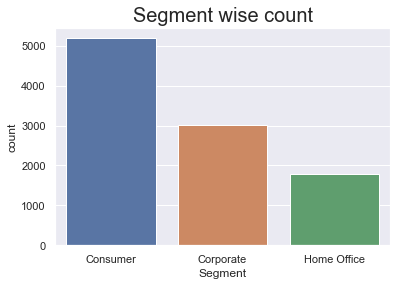

In [9]:
plt.title('Segment wise count', fontsize = 20)
sns.countplot(raw_data['Segment'])
plt.show()

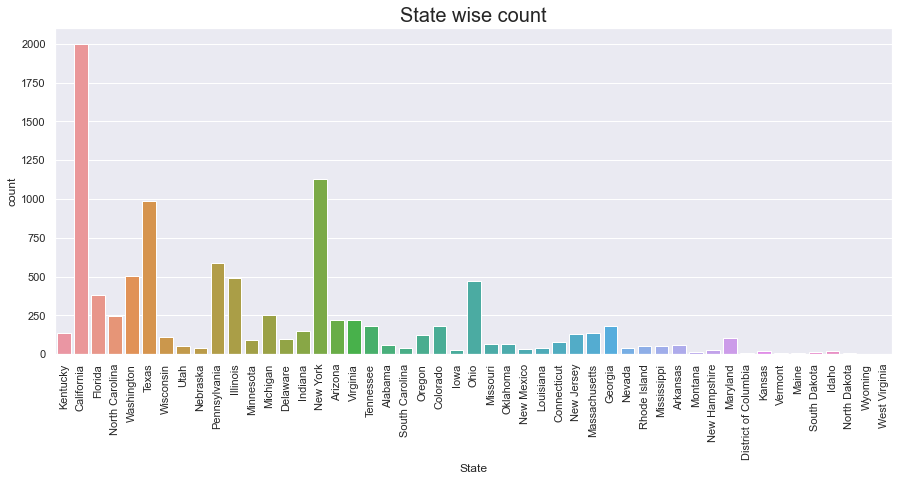

In [10]:
plt.figure(figsize = (15,6))
plt.title('State wise count', fontsize = 20)
sns.countplot(raw_data['State'])
plt.xticks(rotation = 90)
plt.show()

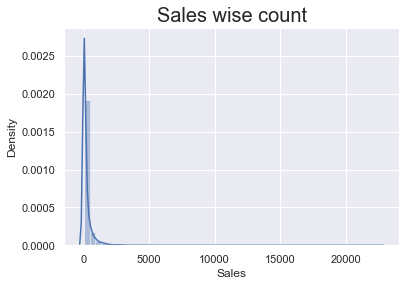

In [11]:
plt.title('Sales wise count', fontsize = 20)
sns.distplot(raw_data['Sales'])
plt.show()

In [12]:
q = raw_data['Sales'].quantile(0.99)
data = raw_data[raw_data['Sales']>q]


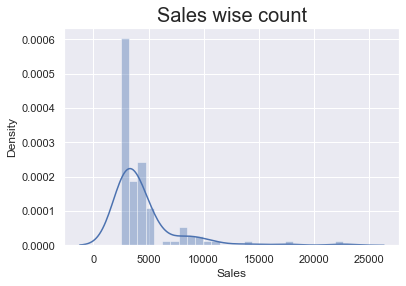

In [13]:
## Here the plot is percentiled so that the plot image is clear for the least data also
plt.title('Sales wise count', fontsize = 20)
sns.distplot(data['Sales'])
plt.show()

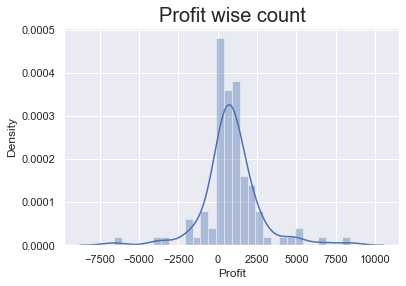

In [14]:
plt.title('Profit wise count', fontsize = 20)
sns.distplot(data['Profit'])
plt.show()

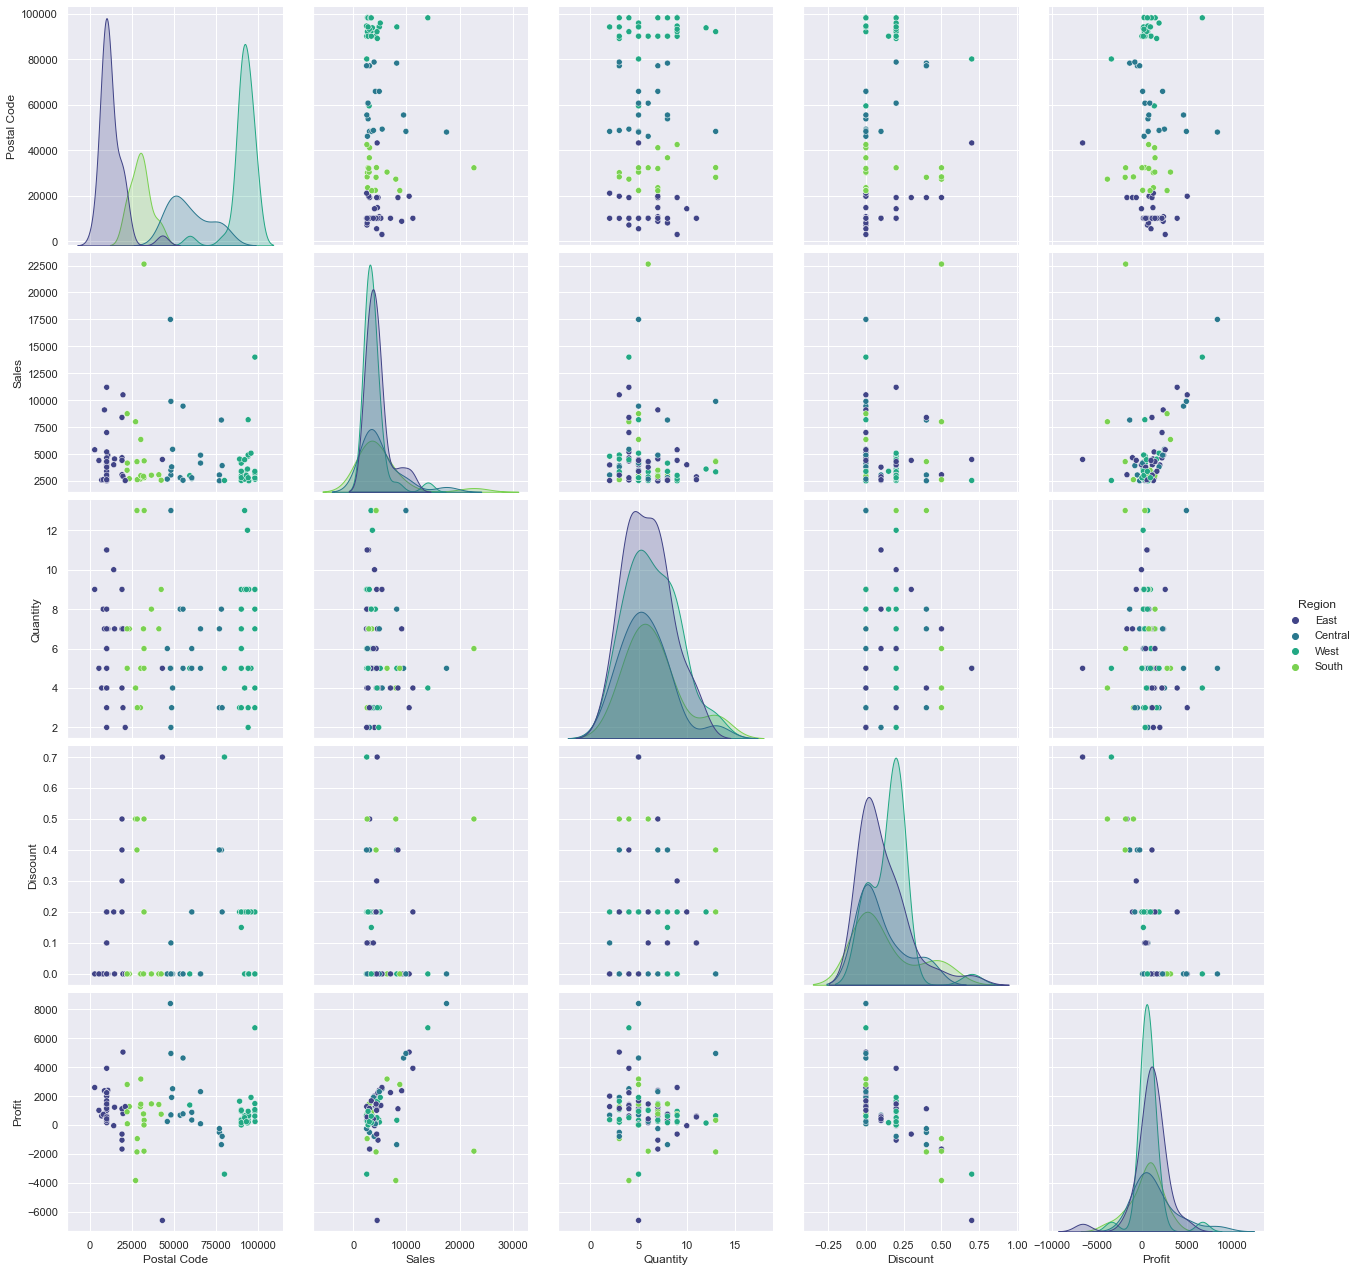

In [15]:
sns.pairplot(data, hue = 'Region', palette = 'viridis', height = 3.6)
plt.show()

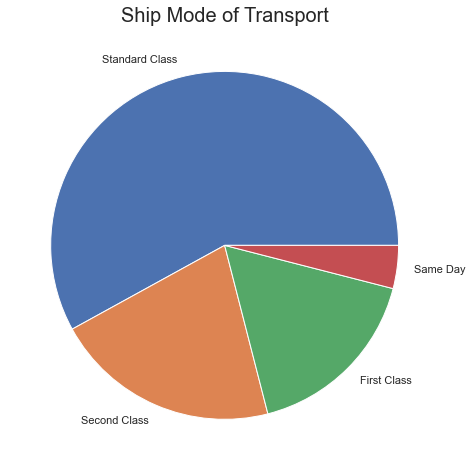

In [16]:
plt.figure(figsize = (8,8))
plt.title('Ship Mode of Transport', fontsize = 20)
plt.pie(data['Ship Mode'].value_counts(),labels = data['Ship Mode'].value_counts().index)
plt.show()

## the standard class is the most used shipment method as can be seen from the pie chart and histplot

## The Distrubition of counts in the segment wise

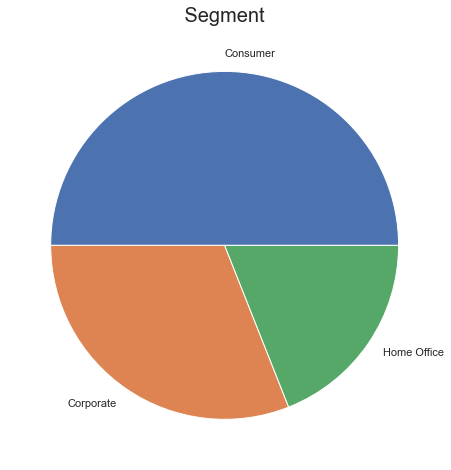

In [17]:
plt.figure(figsize = (8,8))
plt.title(' Segment ', fontsize = 20)
plt.pie(data['Segment'].value_counts(), labels = data['Segment'].value_counts().index)
plt.show()

## Consumer is the main area

## The distrubtion of plots according to the region

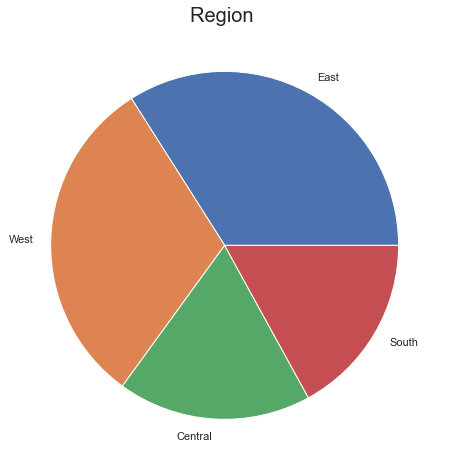

In [18]:
plt.figure(figsize = (8,8))
plt.pie(data['Region'].value_counts(), labels = data['Region'].value_counts().index)
plt.title('Region ' ,fontsize = 20)
plt.show()

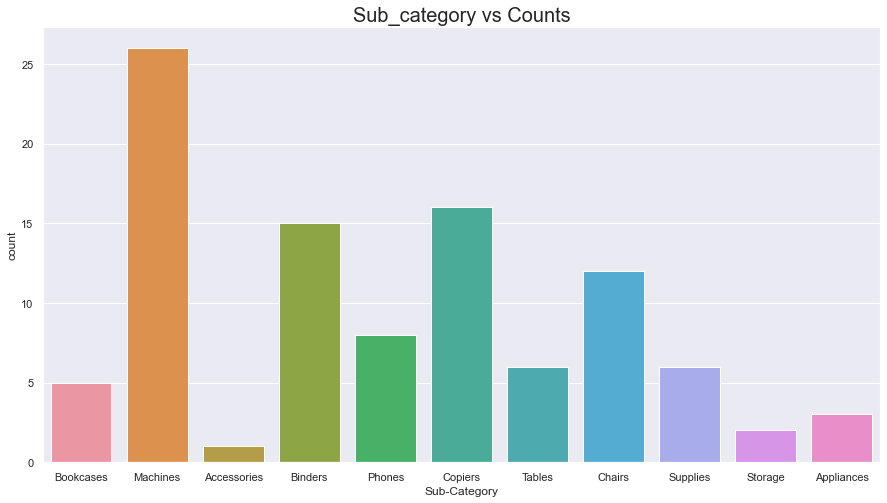

In [19]:
plt.figure(figsize = (15,8))
sns.countplot(data['Sub-Category'])
plt.title('Sub_category vs Counts',fontsize = 20)
plt.show()

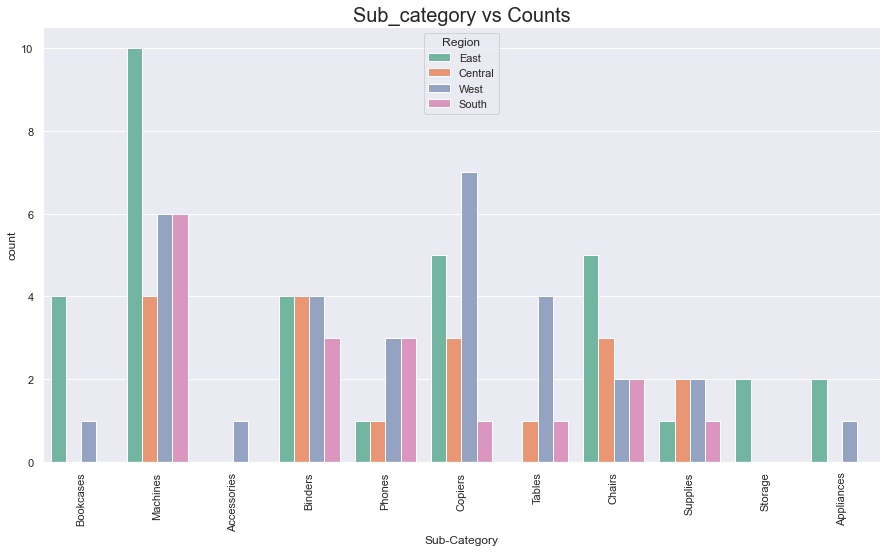

In [20]:
plt.figure(figsize = (15,8))
sns.countplot(x = data['Sub-Category'], hue = data['Region'], palette = 'Set2')
plt.title('Sub_category vs Counts',fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

### Thus, in this way we can analyse different charts and get desired results according to our needs.
### The weak area on which we have to work are which are with the low graph stats.

## The retail is best in California, Texas and Newyork
## The office sales is the most
## Most of the consginments are shared through standard class shipping mode
## The company should work to imporve their sales in South and Central Region
## Many states have very less sales they should work on increasing them